In [1]:
import pandas as pd

table = pd.read_json("dim_customer.json")
table

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [4]:
huhu = pd.read_csv("fct_invoice.csv")
huhu

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


1. How many unique customers are in the dataset?

In [102]:
unique_customers = huhu['customer_id'].unique()
print(len(unique_customers))

5191


2. What are the different categories of products available? How many unique categories are there?

In [108]:
product_category = huhu["category"].unique() 
print(product_category)
print(len(product_category))

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


Easy
3. Which payment method is the most popular? How many times was it used?

In [86]:
yes = huhu['payment_method']
omg=list(yes)
cc=0
dc=0
c=0
for i in omg:
    if i == "Credit Card":
        cc += 1
    if i == "Debit Card":
        dc += 1
    if i == "Cash":
        c += 1

if c>cc and c>dc:
    print("Cash " + str(c))
if dc>cc and dc>c:
    print ("Debit Card " + str(dc))
if cc>dc and cc>c:
    print("Credit Card " + str(cc))

Cash 44447


Medium

1. What are the three most popular categories, by total sales?

In [94]:
categories = huhu["category"].unique()
list(categories)

total_revenue = huhu['quantity'] * huhu['price']
huhu['total_revenue'] = total_revenue
category_sales = huhu.groupby('category')['total_revenue'].sum()
top_3_categories = category_sales.nlargest(3)
print(top_3_categories)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_revenue, dtype: float64


Medium

2. What are the total sales attributed to customers over the age of 45?

In [34]:
df3=pd.merge(huhu,table,left_on="customer_id",right_on="id")
df3

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez


In [47]:
df4=df3[df3['age'] > 45]
df4["total_rev"]=df4["quantity"]*df4["price"]
df4

/var/folders/9v/8pfxm1rs7b7361d2l02kmy5m0000gn/T/ipykernel_51436/3047746581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["total_rev"]=df4["quantity"]*df4["price"]


,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name,total_rev
83,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,46.0,Christopher,M,644,Stephens,300.08
84,I198233,644,Cosmetics,4,162.64,Cash,13/02/2023,Metropol AVM,46.0,Christopher,M,644,Stephens,650.56
85,I225178,644,Clothing,5,1500.40,Credit Card,10/2/2021,Kanyon,46.0,Christopher,M,644,Stephens,7502.00
86,I310772,644,Shoes,5,3000.85,Cash,19/05/2021,Istinye Park,46.0,Christopher,M,644,Stephens,15004.25
87,I712882,644,Clothing,4,1200.32,Cash,21/04/2022,Istinye Park,46.0,Christopher,M,644,Stephens,4801.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99441,I981269,4249,Shoes,5,3000.85,Debit Card,22/07/2021,Mall of Istanbul,73.0,Tina,F,4249,Morgan,15004.25
99444,I154835,8889,Toys,3,107.52,Cash,29/08/2021,Mall of Istanbul,48.0,Chad,M,8889,Hooper,322.56
99449,I251260,4090,Souvenir,5,58.65,Credit Card,25/11/2022,Kanyon,80.0,Melissa,F,4090,Fuller,293.25
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez,1200.32


In [48]:
over_45_sales = df4['total_rev'].sum()
over_45_sales

82039768.15

Medium

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

/var/folders/9v/8pfxm1rs7b7361d2l02kmy5m0000gn/T/ipykernel_51436/2593315019.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])


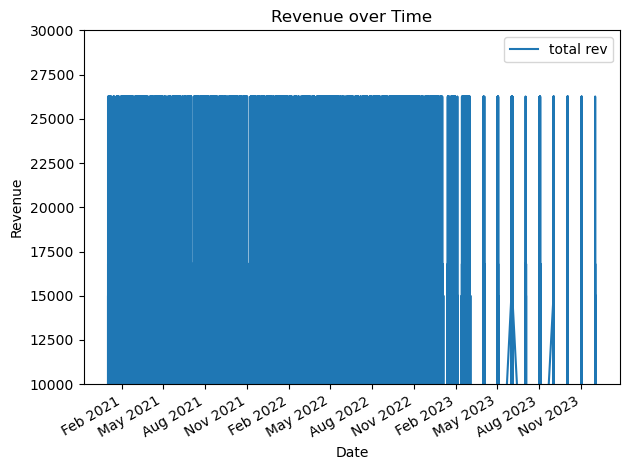

In [50]:
import datetime
import matplotlib.dates as mdates

df3["total rev"] = df3["price"] * df3['quantity']
df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])

# Plotting
ax = df3.plot(x='invoice_date', y='total rev')

# Formatting x-axis as dates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.ylim(10000,30000)

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue over Time')

plt.tight_layout()
plt.show()

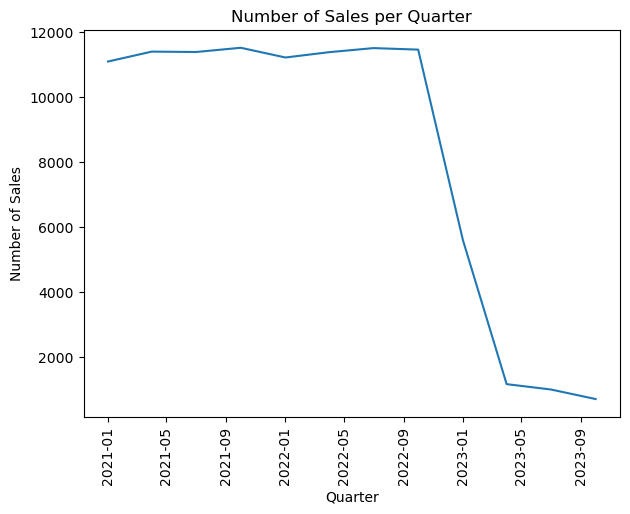

In [52]:
#number of sales (y-axis) in quarters
df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])
df3['Quarter'] = df3['invoice_date'].dt.to_period('Q')

# Count number of sales in each quarter
sales_per_quarter = df3.groupby('Quarter').size()

# Convert Period index to Datetime index
sales_per_quarter.index = sales_per_quarter.index.to_timestamp()
# Plotting
plt.plot(sales_per_quarter.index, sales_per_quarter.values)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y Q%q'))

plt.xlabel('Quarter')
plt.ylabel('Number of Sales')
plt.title('Number of Sales per Quarter')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Hard
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [62]:
age_range = pd.cut(df3['age'], bins = [9, 19, 29, 39, 49, 59, 69, 79, 89], labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89'])
pivot_table = df3.pivot_table(values = 'total rev', index = 'category', columns = age_range, aggfunc = sum)
pivot_table

age,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
